In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import mudata as md
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats

import gc
import sys
sys.path.append('../')

from utils.gglasso_pipeline import gg_lasso_network_analysis
from utils.utils import calc_sparsity
from latentcor import latentcor
from sklearn.covariance import empirical_covariance
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
ec_mudata = md.read("../data/preprocessed/ec_mudata_preprocessed.h5mu")

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\mudata\_core\mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [4]:
ec_pb_filtered = sc.read_10x_h5("../data/probe_based/S1_filtered_feature_bc_matrix.h5")
ec_pb_filtered

AnnData object with n_obs × n_vars = 4762 × 21527
    var: 'gene_ids', 'feature_types', 'genome'

In [5]:
sc.pp.calculate_qc_metrics(ec_pb_filtered, var_type="genes", percent_top=None, log1p=False, inplace=True)

In [2]:
ec_pb_raw = sc.read_10x_h5(filename="../data/probe_based/S2_raw_feature_bc_matrix.h5")
ec_pb_raw

AnnData object with n_obs × n_vars = 327202 × 21982
    var: 'gene_ids', 'feature_types', 'genome'

In [63]:
sc.pp.filter_cells(ec_pb_raw, max_counts=250)
sc.pp.filter_cells(ec_pb_raw, min_counts=10)
sc.pp.filter_genes(ec_pb_raw, min_counts=1)

sc.pp.filter_genes(ec_pb_raw, min_counts=10)
sc.pp.filter_cells(ec_pb_raw, min_counts=1)

print(ec_pb_raw.shape)

(73814, 20039)


In [64]:
sc.pp.filter_cells(ec_pb_raw, min_counts=10)
sc.pp.filter_genes(ec_pb_raw, min_counts=1)

sc.pp.filter_genes(ec_pb_raw, min_counts=10)
sc.pp.filter_cells(ec_pb_raw, min_counts=1)

print(ec_pb_raw.shape)

(73812, 20039)


In [65]:
sc.pp.calculate_qc_metrics(ec_pb_raw, var_type="genes", percent_top=None, log1p=False, inplace=True)

In [66]:
print("Sparsity:\t\t", calc_sparsity(ec_pb_raw.X.A))
print("Mean counts per gene:\t", np.mean(np.sum(ec_pb_raw.X.A, axis=1)))
print("Median counts per gene:\t", np.median(np.sum(ec_pb_raw.X.A, axis=1)))
print("Mean genes per cell: \t", np.mean(np.sum(ec_pb_raw.X.A, axis=0)))
print("Median genes per cell:\t", np.median(np.sum(ec_pb_raw.X.A, axis=0)))

Sparsity:		 0.9948807745018603
Mean counts per gene:	 102.58416
Median counts per gene:	 89.0
Mean genes per cell: 	 377.86026
Median genes per cell:	 98.0


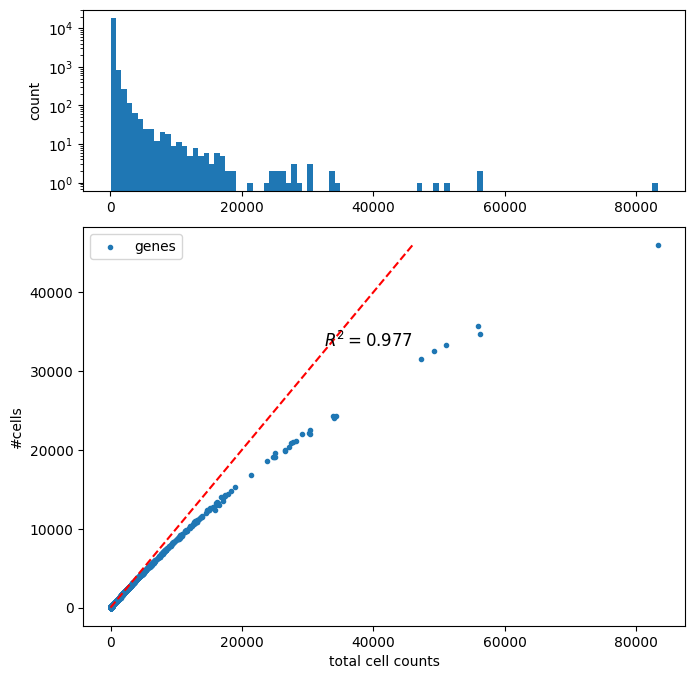

In [71]:
slope, intercept, r_value, p_value, std_err = stats.linregress(ec_pb_raw.var.n_cells_by_counts, ec_pb_raw.var.total_counts)
r_squared_genes = r_value ** 2
r_squared_genes

lim  = min(ec_pb_raw.var.n_cells_by_counts.max(), ec_pb_raw.var.total_counts.max())
line = [0, lim]

fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(3, 3)

ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2])

ax_main.scatter(data=ec_pb_raw.var, x="total_counts" , y="n_cells_by_counts", marker='.', label="genes")
ax_main.plot(line, line, color='red', linestyle="--")
ax_main.set(xlabel="total cell counts", ylabel="#cells")
ax_main.text(0.4, 0.7, f'$R^2 = {r_squared_genes:.3f}$', fontsize=12, transform=ax_main.transAxes)
ax_main.legend()

bins = np.arange(0, lim, 100)

ax_xDist.hist(ec_pb_raw.var["total_counts"], bins=100, align='mid')
ax_xDist.set(ylabel='count')
ax_xDist.set_yscale('log')
#ax_xDist.set_xlim(0, 10000)


plt.show()

In [73]:
sc.pp.calculate_qc_metrics(ec_pb_filtered, var_type="genes", percent_top=None, log1p=False, inplace=True)

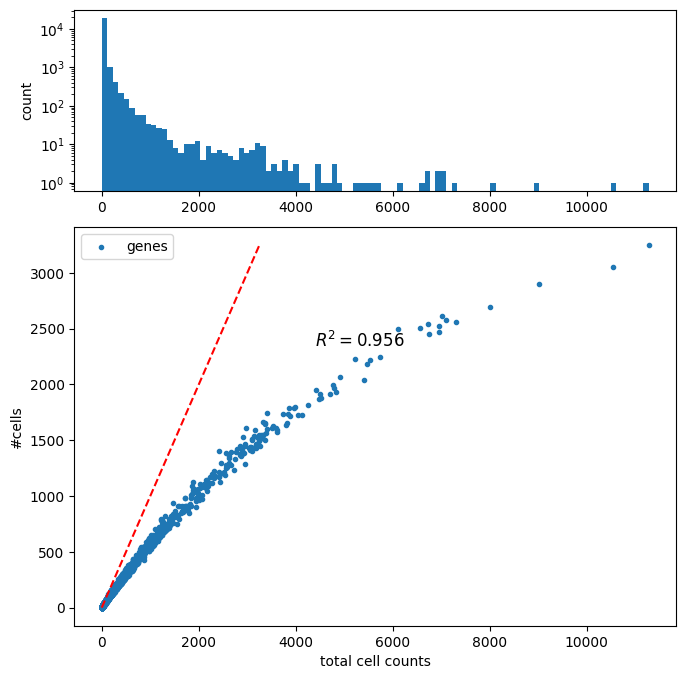

In [74]:
slope, intercept, r_value, p_value, std_err = stats.linregress(ec_pb_filtered.var.n_cells_by_counts, ec_pb_filtered.var.total_counts)
r_squared_genes = r_value ** 2
r_squared_genes

lim  = min(ec_pb_filtered.var.n_cells_by_counts.max(), ec_pb_filtered.var.total_counts.max())
line = [0, lim]

fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(3, 3)

ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2])

ax_main.scatter(data=ec_pb_filtered.var, x="total_counts" , y="n_cells_by_counts", marker='.', label="genes")
ax_main.plot(line, line, color='red', linestyle="--")
ax_main.set(xlabel="total cell counts", ylabel="#cells")
ax_main.text(0.4, 0.7, f'$R^2 = {r_squared_genes:.3f}$', fontsize=12, transform=ax_main.transAxes)
ax_main.legend()

bins = np.arange(0, lim, 100)

ax_xDist.hist(ec_pb_filtered.var["total_counts"], bins=100, align='mid')
ax_xDist.set(ylabel='count')
ax_xDist.set_yscale('log')
#ax_xDist.set_xlim(0, 10000)


plt.show()

In [6]:
est = empirical_covariance(ec_pb_filtered.X.A)

<Axes: >

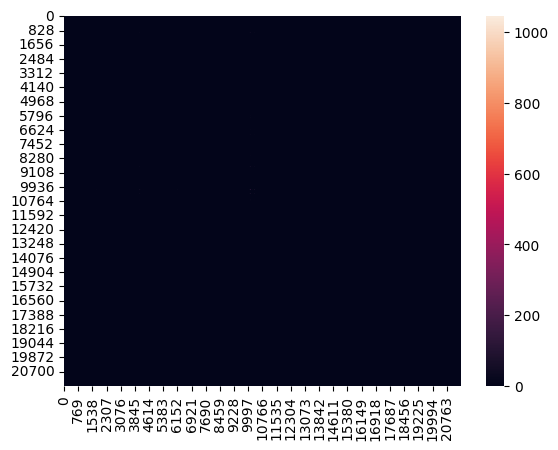

In [7]:
sns.heatmap(est)